In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/Recon3D.json', 'r') as file:
    models = json.loads(file.read())

## Data Inspection

In [4]:
type(models)

dict

In [5]:
len(models)

6

In [6]:
models.keys()

dict_keys(['metabolites', 'reactions', 'genes', 'id', 'compartments', 'version'])

In [7]:
models['id']

'Recon3D'

In [8]:
models['version']

'1'

In [9]:
models['compartments']

{'c': 'cytosol',
 'e': 'extracellular space',
 'g': 'golgi apparatus',
 'i': 'inner mitochondrial compartment',
 'l': 'lysosome',
 'm': 'mitochondria',
 'n': 'nucleus',
 'r': 'endoplasmic reticulum',
 'x': 'peroxisome/glyoxysome'}

In [10]:
models['reactions'][:2]

[{'id': '24_25DHVITD3tm',
  'name': '24,25-Dihydroxyvitamin D3 transport from mitochondria',
  'metabolites': {'2425dhvitd3_c': 1.0, '2425dhvitd3_m': -1.0},
  'lower_bound': 0.0,
  'upper_bound': 1000.0,
  'gene_reaction_rule': '',
  'subsystem': 'Transport, mitochondrial',
  'notes': {'original_bigg_ids': ['24_25DHVITD3tm']},
  'annotation': {'bigg.reaction': ['24_25DHVITD3tm'],
   'metanetx.reaction': ['MNXR94734'],
   'sbo': 'SBO:0000185'}},
 {'id': '25HVITD3t',
  'name': '25-hydroxyvitamin D3 transport from cytoplasm',
  'metabolites': {'25hvitd3_c': -1.0, '25hvitd3_e': 1.0},
  'lower_bound': 0.0,
  'upper_bound': 1000.0,
  'gene_reaction_rule': '',
  'subsystem': 'Transport, extracellular',
  'notes': {'original_bigg_ids': ['25HVITD3t']},
  'annotation': {'bigg.reaction': ['25HVITD3t'],
   'metanetx.reaction': ['MNXR94739'],
   'sbo': 'SBO:0000185'}}]

In [11]:
models['metabolites'][:2]

[{'id': '10fthf_c',
  'name': '10-Formyltetrahydrofolate',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C20H21N7O7',
  'notes': {'original_bigg_ids': ['10fthf[c]']},
  'annotation': {'bigg.metabolite': ['10fthf'],
   'biocyc': ['META:10-FORMYL-THF'],
   'chebi': ['CHEBI:19108',
    'CHEBI:15637',
    'CHEBI:698',
    'CHEBI:19109',
    'CHEBI:11304',
    'CHEBI:57454'],
   'hmdb': ['HMDB00972'],
   'inchi_key': ['AUFGTPPARQZWDO-YPMHNXCESA-L'],
   'kegg.compound': ['C00234'],
   'metanetx.chemical': ['MNXM237'],
   'reactome.compound': ['5389850', '419151'],
   'sabiork': ['1318'],
   'sbo': 'SBO:0000247',
   'seed.compound': ['cpd00201']}},
 {'id': '10fthf_l',
  'name': '10-Formyltetrahydrofolate',
  'compartment': 'l',
  'charge': -2,
  'formula': 'C20H21N7O7',
  'notes': {'original_bigg_ids': ['10fthf[l]']},
  'annotation': {'bigg.metabolite': ['10fthf'],
   'biocyc': ['META:10-FORMYL-THF'],
   'chebi': ['CHEBI:19108',
    'CHEBI:15637',
    'CHEBI:698',
    'CHEBI:19109',
   

## 'gene reaction rule' in 'reactions'

In [12]:
for i, reaction in enumerate(models['reactions']):
    if i < 60:
        print(reaction['gene_reaction_rule'])
    else:
        break
        











1591_AT1




8639_AT1 or 26_AT1 or 314_AT2 or 314_AT1



1594_AT1
10993_AT1
6818_AT1
89874_AT1

(4967_AT2 and 1738_AT1 and 8050_AT1 and 1743_AT1) or (4967_AT1 and 1738_AT1 and 8050_AT1 and 1743_AT1)
89874_AT1
117247_AT1
221_AT1 or 218_AT1 or 220_AT1

18_AT1 or 18_AT2
23498_AT1


4128_AT1 or 4129_AT1

4129_AT1 or 8639_AT1 or 26_AT1 or 314_AT2 or 314_AT1 or 4128_AT1



222_AT1 or 220_AT1 or 221_AT1 or 218_AT1


6799_AT1 or 6817_AT3 or 6799_AT2 or 6818_AT2 or 6817_AT2 or 6818_AT1 or 6817_AT1 or 6817_AT4 or 6818_AT3 or 6817_AT5


6822_AT1 or 6818_AT1

6573_AT1 or 6573_AT2
4128_AT1 or 4129_AT1




53947_AT1
53947_AT1
51146_AT1

28_AT1
28_AT1
28_AT1


From above, we see that some reactions are ruled by some genes, and some reactions are not ruled by any gene.

## look at a spefic reaction and compare data to its web infomation

In [13]:
# http://bigg.ucsd.edu/models/iND750/reactions/13BGH
for reaction in models['reactions']:
    if reaction['id'] == '13BGH':
        print(reaction)

The useful attribute here is *'metabolites'*, 

In [14]:
for gene in models['genes']:
    if gene['id'] == 'YGR282C':
        print(gene)

## Data Preparation

In [15]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [16]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    if m['id'] == metabolite:
                        # exclude inorganic metabolites
                        try:
                            if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                                if v > 0 and metabolite not in genes[gene['id']]['products']:
                                    genes[gene['id']]['products'].append(metabolite)
                                if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                    genes[gene['id']]['substrates'].append(metabolite)
                            elif metabolite not in inorganics:
                                inorganics.append(metabolite)
                            else:
                                break
                        except KeyError:
                            print(m)
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [17]:
inorganics

['h2o_c',
 'nh4_c',
 'co2_m',
 'h_c',
 'h_l',
 'pi_c',
 'ppi_c',
 'na1_c',
 'na1_e',
 'h_g',
 'h2o_l',
 'co2_c',
 'h2o_x',
 'o2_x',
 'h2o_e',
 'h2o_m',
 'nh4_m',
 'h_m',
 'h_e',
 'k_c',
 'k_e',
 'co2_r',
 'h_r',
 'h2o_r',
 'o2_r',
 'o2_m',
 'o2_c',
 'h2o2_x',
 'nh4_x',
 'pi_r',
 'ppi_m',
 'etfox_m',
 'etfrd_m',
 'h_x',
 'fe2_e',
 'fe3_e',
 'pi_m',
 'fucfucgalacglcgal14acglcgalgluside_hs_g',
 'fucgalacglc13galacglcgal14acglcgalgluside_hs_g',
 'h2o_g',
 'h2o2_c',
 'h2o2_m',
 'nh4_e',
 'pi_l',
 'gpi_sig_r',
 'pre_prot_r',
 'so4_l',
 'no_c',
 'pi_e',
 'so4_c',
 'acngalacglcgalgluside_hs_g',
 'co2_g',
 'ppi_x',
 'pi_x',
 'o2_e',
 'HC00617_c',
 'HC00619_c',
 'ppi_e',
 'ppi_r',
 'trdox_c',
 'trdrd_c',
 'co2_e',
 'HC02199_c',
 'HC02199_e',
 'so4_e',
 'h2o_n',
 'trdox_n',
 'trdrd_n',
 'h2o2_e',
 'so3_e',
 'M02012_l',
 'oh1_c',
 'h2o2_l',
 'peplys_c',
 'oh1_e',
 'h_i',
 'galacgalfuc12gal14acglcgalgluside_hs_g',
 'acgalfucgalacglcgal14acglcgalgluside_hs_g',
 'galacgalfucgalacglcgal14acglcgalglusi

In [18]:
df = pd.DataFrame.from_dict(genes).T
df

,reactions,substrates,products,links
0,"[2AMACHYD, 2OXOADOXm, 34DHXMANDACOX, 4HOXPACDO...","[2amac_c, 2oxoadp_m, coa_m, nad_m, 34dhmald_c,...","[pyr_c, glutcoa_m, nadh_m, 34dhoxmand_c, nadh_...","[9194_AT1, 6566_AT1, 189_AT1, 39_AT1, 622_AT1,..."
26_AT1,"[13DAMPPOX, 42A12BOOX, ALCD21_D, ALCD22_D, ATP...","[13dampp_c, dopa_c, 12ppd__R_c, nad_c, lald__D...","[bamppald_c, 34dhpac_c, lald__D_c, nadh_c, mth...","[0, 54_AT1, 8854_AT3, 224_AT1, 501_AT1, 8854_A..."
314_AT1,"[13DAMPPOX, 42A12BOOX, MHISOR, PTRCOX1, TRYPTA...","[13dampp_c, dopa_c, mhista_c, ptrc_c, trypta_c...","[bamppald_c, 34dhpac_c, 3mldz_c, 4abutn_c, id3...","[0, 54_AT1, 8854_AT3, 224_AT1, 501_AT1, 8854_A..."
8639_AT1,"[13DAMPPOX, 42A12BOOX, MHISOR, PTRCOX1, HMR_65...","[13dampp_c, dopa_c, mhista_c, ptrc_c, pail35p_...","[bamppald_c, 34dhpac_c, 3mldz_c, 4abutn_c, pai...","[0, 54_AT1, 8854_AT3, 224_AT1, 501_AT1, 8854_A..."
314_AT2,"[13DAMPPOX, 42A12BOOX, MHISOR, PTRCOX1, TRYPTA...","[13dampp_c, dopa_c, mhista_c, ptrc_c, trypta_c...","[bamppald_c, 34dhpac_c, 3mldz_c, 4abutn_c, id3...","[0, 54_AT1, 8854_AT3, 224_AT1, 501_AT1, 8854_A..."
...,...,...,...,...
27089_AT1,"[CYOOm2i, CYOR_u10mi]","[focytC_m, ficytC_m, q10h2_m]","[ficytC_m, focytC_m, q10_m]","[0, 19_AT1, 384_AT1, 124637_AT1, 197257_AT1, 6..."
10975_AT1,"[CYOOm2i, CYOR_u10mi]","[focytC_m, ficytC_m, q10h2_m]","[ficytC_m, focytC_m, q10_m]","[0, 19_AT1, 384_AT1, 124637_AT1, 197257_AT1, 6..."
7381_AT1,"[CYOOm2i, CYOR_u10mi]","[focytC_m, ficytC_m, q10h2_m]","[ficytC_m, focytC_m, q10_m]","[0, 19_AT1, 384_AT1, 124637_AT1, 197257_AT1, 6..."
29796_AT1,"[CYOOm2i, CYOR_u10mi]","[focytC_m, ficytC_m, q10h2_m]","[ficytC_m, focytC_m, q10_m]","[0, 19_AT1, 384_AT1, 124637_AT1, 197257_AT1, 6..."


In [19]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

,index,links
0,0,9194_AT1
1,0,6566_AT1
2,0,189_AT1
3,0,39_AT1
4,0,622_AT1
...,...,...
232129,4519_AT1,4714_AT1
232130,4519_AT1,4722_AT1
232131,4519_AT1,51079_AT1
232132,4519_AT1,13_AT1


In [20]:
# show genes having no links
print(df.loc[df['links'].str.len() == 0])

                                        reactions  \
316_AT1     [5HOXINDACTO2OX, ALLOPOXDhep, PYDXDH]   
79814_AT1                                 [AGMTm]   
4126_AT1                            [B_MANNASEly]   
26503_AT1           [ACNAMlt, IDOURtly, GLCURtly]   
53630_AT1                                  [BCDO]   
...                                           ...   
81894_AT1                                [FE2utm]   
158584_AT1                             [HMR_7756]   
23491_AT1                              [HMR_8643]   
221223_AT1                             [HMR_8643]   
1066_AT1                               [HMR_8643]   

                                 substrates                         products  \
316_AT1     [5hoxindact_c, allop_c, pydx_c]  [5hoxindoa_c, oxyp_c, 4pyrdx_c]   
79814_AT1                           [agm_m]                 [ptrc_m, urea_m]   
4126_AT1                             [mn_l]                 [acgam_l, man_l]   
26503_AT1       [acnam_c, idour_c, glcur_c]

In [21]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [22]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [23]:
giant = max(connected_component_subgraphs(G), key=len)

In [24]:
giant.number_of_nodes()

2174

## Laplacian and Eigen

In [25]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes())).astype(np.int64)
L.todense()

matrix([[2078,   -1,   -1, ...,   -1,   -1,   -1],
        [  -1,  127,    0, ...,    0,    0,    0],
        [  -1,    0,   34, ...,    0,    0,    0],
        ...,
        [  -1,    0,    0, ...,   63,    0,    0],
        [  -1,    0,    0, ...,    0,    4,    0],
        [  -1,    0,    0, ...,    0,    0,   19]], dtype=int64)

In [26]:
eig = np.linalg.eig(L.todense())

## Plotting

In [27]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)

In [28]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [29]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [30]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot 1st, 2nd, 3rd smallest, and largest coefficient

C:\Users\zhouy\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


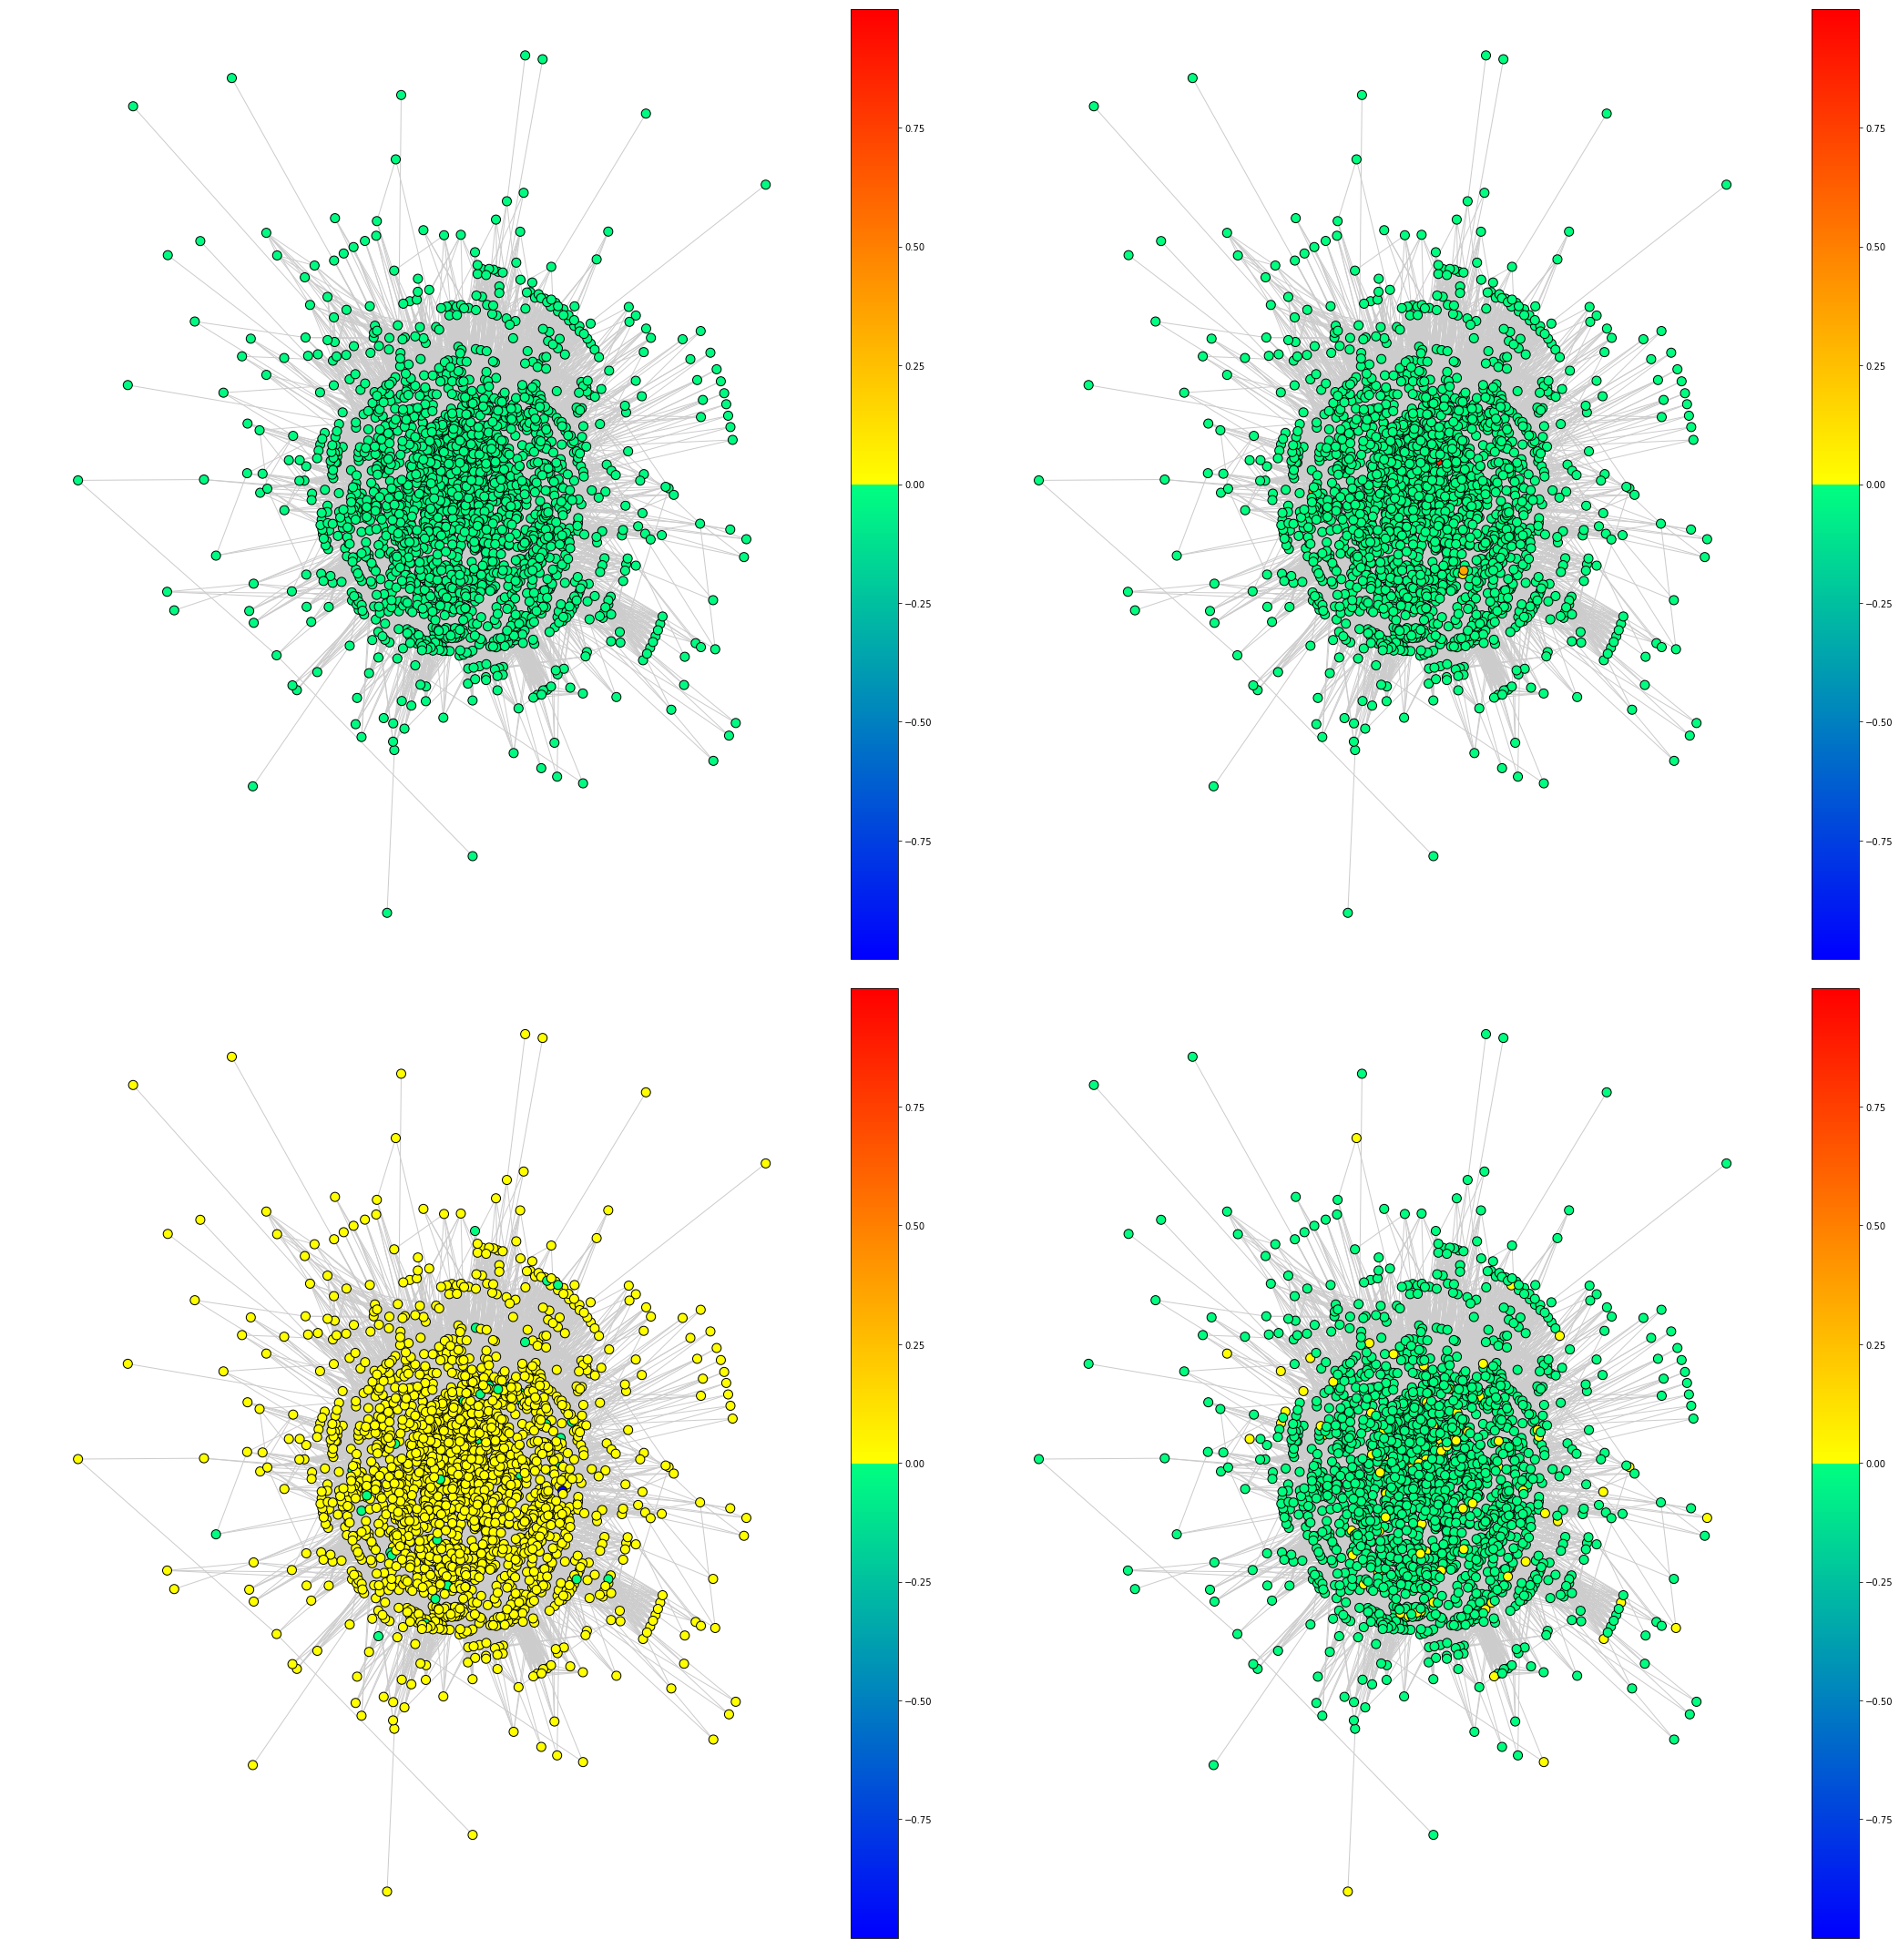

In [31]:
k_lst = [0, 1, 2, len(eig[0])-1]
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(2,2,i+1)
    draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()